In [22]:
import sys
import os

# Get the absolute path to the notebook's directory
notebook_dir = os.path.dirname(os.path.abspath('__file__'))
# Add the project root (parent of notebook dir) to Python path
project_root = os.path.dirname(notebook_dir)
sys.path.append(project_root)

In [23]:
import matplotlib.pyplot as plt

In [24]:

from data.dataset import TUMTraf


In [25]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [26]:
import glob, re

In [ ]:
from pathlib import Path

data_dir_val = Path(project_root) / "data" / "TUMTraf_Event_Dataset" / "val"
rgb_val_data = str(data_dir_val / "images" / "rgb")

eb_val_data = str(data_dir_val / "images" / "eb_transformed")

rgb_val_label = str(data_dir_val / "OPENLabel_labels_rgb")
eb_val_label = str(data_dir_val / "OPENLabel_labels_eb")

tumtraf_rbg_val_dataset = TUMTraf(img_dir=rgb_val_data, label_dir=rgb_val_label)
tumtraf_eb_val_dataset = TUMTraf(img_dir=eb_val_data, label_dir=eb_val_label)

In [ ]:
import json

def apply_roi(image_path:Path, label_path:Path, roi:dict) -> None:
    """
    Applies the ROI transformation to labels and grouped images
    :param image_path: path to gruped frames
    :param label_path: path to labels
    :param roi: ROI coordinates (x, y, width, height)

    :return: None, writes directly to disk
    """

    frame_files = sorted(image_path.glob("*/*.jpg"))
    print (f"Found {len(frame_files)} frame files to process.")
    label_data = None
    for frame_file in frame_files:
        # load image
        img = cv2.imread(str(frame_file))
        # crop
        x, y, w, h = roi["x"], roi["y"], roi["width"], roi["height"]
        cropped_img = img[y:h, x:w]
        # overwrite
        print (f"Processing frame file: {str(frame_file)}")
        cv2.imwrite(str(frame_file), cropped_img)

    # process labels
    label_files = sorted(label_path.glob("*/*.json"))
    print (f"Found {len(label_files)} label files to process.")    
    for label_file in label_files:
        with open(label_file, 'r') as f:
            label_data = json.load(f)

        # example dict {'openlabel': {'metadata': {'schema_version': '1.0.0'}, 'coordinate_systems': 169, 'frames': {'169': {'objects': {'0': {'object_data': {'name': 'PEDESTRIAN_0', 'type': 'PEDESTRIAN', 'bbox': [{'name': 'full_bbox', 'val': [568, 167, 38, 58], 'attributes': {'text': [{'name': 'sensor_id', 'val': 'default_cam'}]}}]}}, '1': {'object_data': {'name': 'PEDESTRIAN_1', 'type': 'PEDESTRIAN', 'bbox': [{'name': 'full_bbox', 'val': [574, 241, 46, 87], 'attributes': {'text': [{'name': 'sensor_id', 'val': 'default_cam'}]}}]}}, '2': {'object_data': {'name': 'CAR_2', 'type': 'CAR', 'bbox': [{'name': 'full_bbox', 'val': [258, 24, 46, 39], 'attributes': {'text': [{'name': 'sensor_id', 'val': 'default_cam'}]}}]}}, '3': {'object_data': {'name': 'TRUCK_3', 'type': 'TRUCK', 'bbox': [{'name': 'full_bbox', 'val': [309, 137, 81, 135], 'attributes': {'text': [{'name': 'sensor_id', 'val': 'default_cam'}]}}]}}, '4': {'object_data': {'name': 'CAR_4', 'type': 'CAR', 'bbox': [{'name': 'full_bbox', 'val': [392, 22, 34, 36], 'attributes': {'text': [{'name': 'sensor_id', 'val': 'default_cam'}]}}]}}, '5': {'object_data': {'name': 'TRAILER_5', 'type': 'TRAILER', 'bbox': [{'name': 'full_bbox', 'val': [347, 28, 48, 56], 'attributes': {'text': [{'name': 'sensor_id', 'val': 'default_cam'}]}}]}}, '6': {'object_data': {'name': 'CAR_6', 'type': 'CAR', 'bbox': [{'name': 'full_bbox', 'val': [262, 33, 45, 43], 'attributes': {'text': [{'name': 'sensor_id', 'val': 'default_cam'}]}}]}}, '7': {'object_data': {'name': 'CAR_7', 'type': 'CAR', 'bbox': [{'name': 'full_bbox', 'val': [375, 40, 41, 43], 'attributes': {'text': [{'name': 'sensor_id', 'val': 'default_cam'}]}}]}}, '8': {'object_data': {'name': 'TRAILER_8', 'type': 'TRAILER', 'bbox': [{'name': 'full_bbox', 'val': [126, 107, 27, 166], 'attributes': {'text': [{'name': 'sensor_id', 'val': 'default_cam'}]}}]}}, '9': {'object_data': {'name': 'CAR_9', 'type': 'CAR', 'bbox': [{'name': 'full_bbox', 'val': [195, 49, 56, 49], 'attributes': {'text': [{'name': 'sensor_id', 'val': 'default_cam'}]}}]}}}}}}}
        for frame_id, frame_content in label_data.get("openlabel", {}).get("frames", {}).items():
            for obj_id, obj_content in frame_content.get("objects", {}).items():
                bbox_list = obj_content.get("object_data", {}).get("bbox", [])
                for bbox in bbox_list:
                    if bbox.get("name") == "full_bbox":
                        x_val, y_val, box_w, box_h = bbox.get("val", [0,0,0,0])
                        # adjust coordinates
                        x_val -= roi['x']
                        y_val -= roi['y']
                        # update bbox
                        bbox["val"] = [x_val, y_val, box_w, box_h]

        with open(label_file, 'w') as f:
            json.dump(label_data, f)

    


In [51]:
index = 0

for i, (img, label) in enumerate(tumtraf_eb_val_dataset):
    if '20231114-082434.166224' == label['id']: 
        index = i
        print (img)

tensor([[[128, 128, 128,  ..., 128, 128, 128],
         [128, 128, 128,  ..., 128, 128, 128],
         [128, 128, 128,  ..., 128, 128, 128],
         ...,
         [128, 128, 128,  ..., 128, 128, 128],
         [128, 128, 128,  ..., 128, 128, 128],
         [128, 128, 128,  ..., 128, 128, 128]]], dtype=torch.uint8)


In [29]:

print ("for rgb")
img, label = tumtraf_rbg_val_dataset[index]
print(img.shape)

print ("for eb")
img_eb, label_eb = tumtraf_eb_val_dataset[index]
print(img_eb.shape)

for rgb
torch.Size([3, 480, 640])
for eb
torch.Size([1, 480, 640])


In [ ]:
{
        "x": 130, "width": 612, "y": 9, "height": 451
}

In [114]:
def load_eb_roi(eb_roi_path):


    """Load EB ROI from .txt, returns dict with x,y,width,height"""
    with open(eb_roi_path, 'r') as f:
        lines = f.readlines()
        y = int(float(lines[0].strip()))
        x = int(float(lines[1].strip()))
        width = int(float(lines[2].strip()))
        height = int(float(lines[3].strip()))
    return {"x": x, "y": y, "width": width, "height": height}


roi_path = "/home/jose/Documents/projects/neuromorph_vs_noise/noise_in_snn/data/TUMTraf_Event_Dataset/calibration/intrinsic/eb_8mm_roi.txt"

eb_roi = load_eb_roi(roi_path)
print (eb_roi)

{'x': 13, 'y': 9, 'width': 612, 'height': 451}


label for rgb

In [30]:
label

{'id': '20231114-082434.166224',
 'data': {'openlabel': {'metadata': {'schema_version': '1.0.0'},
   'coordinate_systems': 169,
   'frames': {'169': {'objects': {'0': {'object_data': {'name': 'CAR_0',
        'type': 'CAR',
        'bbox': [{'name': 'full_bbox',
          'val': [257, 24, 25, 18],
          'attributes': {'text': [{'name': 'sensor_id',
             'val': 'default_cam'}]}}]}},
      '1': {'object_data': {'name': 'PEDESTRIAN_1',
        'type': 'PEDESTRIAN',
        'bbox': [{'name': 'full_bbox',
          'val': [573, 240, 27, 65],
          'attributes': {'text': [{'name': 'sensor_id',
             'val': 'default_cam'}]}}]}},
      '2': {'object_data': {'name': 'CAR_2',
        'type': 'CAR',
        'bbox': [{'name': 'full_bbox',
          'val': [601, 430, 75, 97],
          'attributes': {'text': [{'name': 'sensor_id',
             'val': 'default_cam'}]}}]}},
      '3': {'object_data': {'name': 'CAR_3',
        'type': 'CAR',
        'bbox': [{'name': 'full_bbox'

label for eb

In [31]:
label_eb

{'id': '20231114-082434.166224',
 'data': {'openlabel': {'metadata': {'schema_version': '1.0.0'},
   'coordinate_systems': 169,
   'frames': {'169': {'objects': {'0': {'object_data': {'name': 'PEDESTRIAN_0',
        'type': 'PEDESTRIAN',
        'bbox': [{'name': 'full_bbox',
          'val': [568, 167, 38, 58],
          'attributes': {'text': [{'name': 'sensor_id',
             'val': 'default_cam'}]}}]}},
      '1': {'object_data': {'name': 'PEDESTRIAN_1',
        'type': 'PEDESTRIAN',
        'bbox': [{'name': 'full_bbox',
          'val': [574, 241, 46, 87],
          'attributes': {'text': [{'name': 'sensor_id',
             'val': 'default_cam'}]}}]}},
      '2': {'object_data': {'name': 'CAR_2',
        'type': 'CAR',
        'bbox': [{'name': 'full_bbox',
          'val': [258, 24, 46, 39],
          'attributes': {'text': [{'name': 'sensor_id',
             'val': 'default_cam'}]}}]}},
      '3': {'object_data': {'name': 'TRUCK_3',
        'type': 'TRUCK',
        'bbox': [{'

rgb image

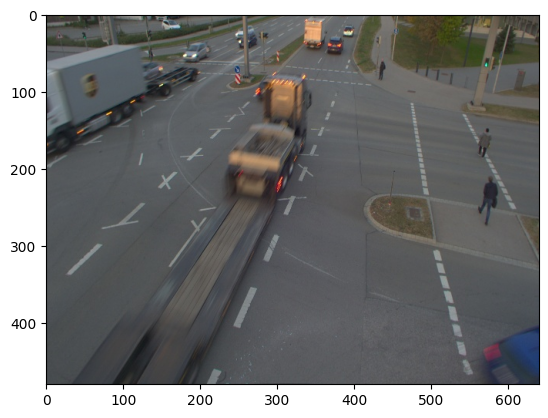

In [32]:


image =  img.numpy().transpose(1, 2, 0)
plt.imshow(image)

eb based image

: ,:460 ,115:600 ??

---vertical, horizontal

shape original (480, 640, 1)
shape after (460, 495, 1)


channel


9.000000000000000000e+00 = 9 = y
1.300000000000000000e+01 = 130 = x
6.120000000000000000e+02 = 612 = width
4.510000000000000000e+02 = 451 = height


{
        "x": 130, "width": 612, "y": 9, "height": 451
}
 

shape original (480, 640, 1)
shape after (442, 482, 1)


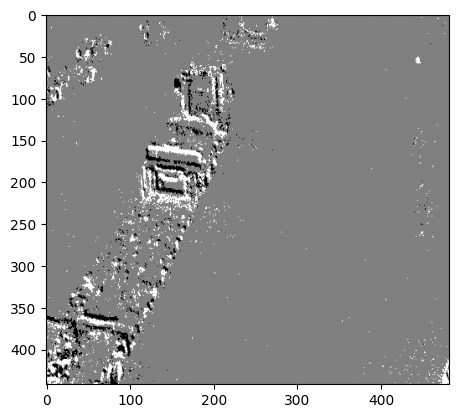

In [47]:
image_eb =  img_eb.numpy().transpose(1, 2, 0)

print ("shape original", image_eb.shape)

image_eb_cropped = img_eb[:,9:451, 130:612].numpy().transpose(1, 2, 0)

print ("shape after", image_eb_cropped.shape)
plt.imshow(image_eb_cropped, cmap='gray')


(480, 640, 1)


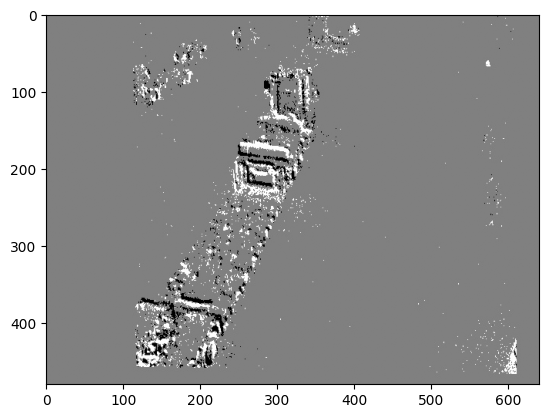

In [34]:
print( image_eb.shape)

plt.imshow(image_eb, cmap='gray')



draw the bounding boxes on top of the images

In [35]:
label['data']['openlabel']['frames'].keys()

dict_keys(['169'])

In [102]:


def draw_boxes_from_openlabel(image, label_data, thickness=2, transform=None):
    """
    Draw bounding boxes from OPENLabel format
    
    label_data: dict with structure {'data': {'openlabel': {'frames': {...}}}}
    bbox format in OPENLabel: [x_center, y_center, width, height]
    """
    image_copy = image.copy()
    
    # Extract frames from label data
    frames = label_data['data']['openlabel']['frames']
    
    # Get the first frame
    frame_key = list(frames.keys())[0]
    frame = frames[frame_key]
    
    # Extract objects
    objects = frame.get('objects', {})

    crop_y, crop_x = 0,0
    if transform:
        crop_x = transform.get("x")
        crop_y = transform.get("y")
    
    # Color map for different object types
    color_map = {
        'CAR': (0, 255, 0),      # Green
        'TRUCK': (0, 0, 255),    # Red
        'TRAILER': (255, 0, 0),  # Blue
        'BUS': (255, 255, 0),    # Cyan
        'MOTORCYCLE': (255, 0, 255)  # Magenta
    }
    
    # Draw each object
    for obj_id, obj_info in objects.items():
        object_data = obj_info['object_data']
        obj_type = object_data['type']
        obj_name = object_data['name']
        
        # Get bounding box - find full_bbox
        full_bbox = None
        if "bbox" in object_data and len(object_data["bbox"]) > 0:
            if len(object_data["bbox"]) == 1:
                full_bbox = object_data["bbox"][0]
            else:
                for bbox in object_data["bbox"]:
                    if bbox["name"] == "full_bbox":
                        full_bbox = bbox
                        break
        if full_bbox is not None:
            # bbox format: [x_center, y_center, width, height]
            x_center = int(full_bbox["val"][0]) - crop_x
            y_center = int(full_bbox["val"][1]) - crop_y
            width = int(full_bbox["val"][2]) 
            height = int(full_bbox["val"][3])
            
            # Convert to top-left and bottom-right coordinates
            x_min = int(x_center - width / 2)
            y_min = int(y_center - height / 2)
            x_max = int(x_center + width / 2)
            y_max = int(y_center + height / 2) 
            
            # Get color based on object type
            color = color_map.get(obj_type, (200, 200, 200))
            
            # Draw rectangle
            cv2.rectangle(image_copy, (x_min, y_min), (x_max, y_max), color, thickness)
            
            # Draw label
            label_text = f"{obj_name} ({obj_type})"
            cv2.putText(image_copy, label_text, (x_min, y_min - 10),
                       cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    
    return image_copy



Found 0 frame files to process.


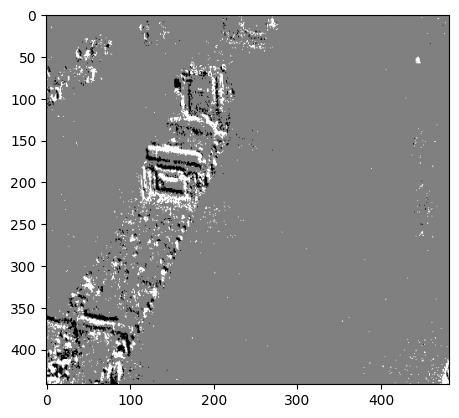

label data before {'openlabel': {'metadata': {'schema_version': '1.0.0'}, 'coordinate_systems': 169, 'frames': {'169': {'objects': {'0': {'object_data': {'name': 'PEDESTRIAN_0', 'type': 'PEDESTRIAN', 'bbox': [{'name': 'full_bbox', 'val': [568, 167, 38, 58], 'attributes': {'text': [{'name': 'sensor_id', 'val': 'default_cam'}]}}]}}, '1': {'object_data': {'name': 'PEDESTRIAN_1', 'type': 'PEDESTRIAN', 'bbox': [{'name': 'full_bbox', 'val': [574, 241, 46, 87], 'attributes': {'text': [{'name': 'sensor_id', 'val': 'default_cam'}]}}]}}, '2': {'object_data': {'name': 'CAR_2', 'type': 'CAR', 'bbox': [{'name': 'full_bbox', 'val': [258, 24, 46, 39], 'attributes': {'text': [{'name': 'sensor_id', 'val': 'default_cam'}]}}]}}, '3': {'object_data': {'name': 'TRUCK_3', 'type': 'TRUCK', 'bbox': [{'name': 'full_bbox', 'val': [309, 137, 81, 135], 'attributes': {'text': [{'name': 'sensor_id', 'val': 'default_cam'}]}}]}}, '4': {'object_data': {'name': 'CAR_4', 'type': 'CAR', 'bbox': [{'name': 'full_bbox', 'va

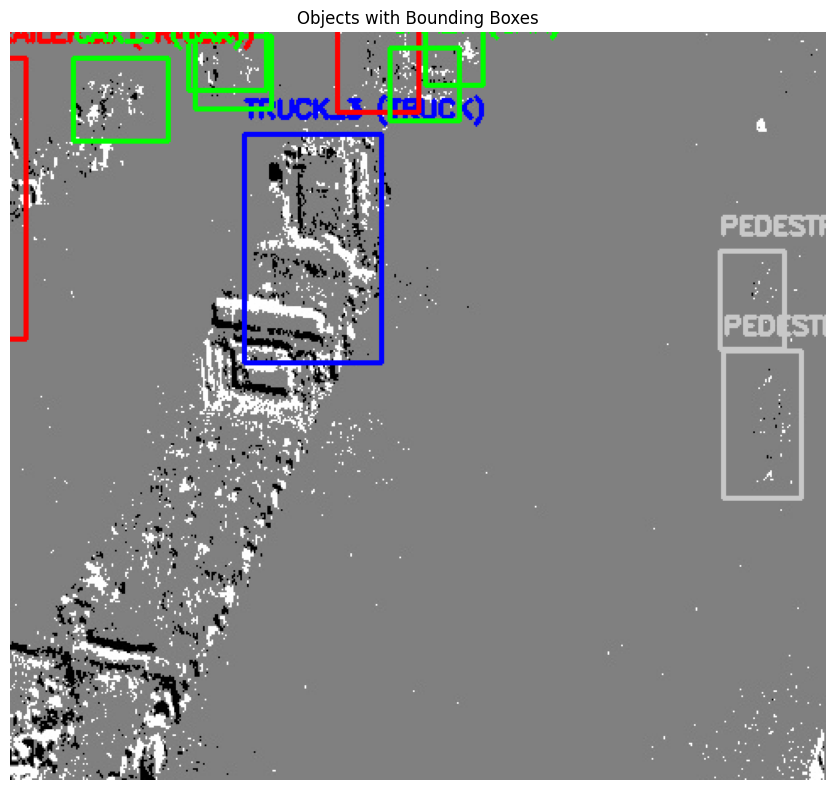

In [112]:
img_path = Path(eb_val_data) / "20231114-082434.166224.jpg"
label_path = Path(eb_val_label) / "20231114-082434.166224.json"
    
cropped, label_adjusted = apply_roi(img_path, label_path, roi={
        "x": 130, "width": 612, "y": 9, "height": 451
}, show=True)


print('label adjusted', label_adjusted)
painted_cropped = draw_boxes_from_openlabel(cropped, {"data":label_adjusted})


plt.figure(figsize=(12, 8))
plt.imshow(painted_cropped ,cmap='gray'  )
plt.title('Objects with Bounding Boxes')
plt.axis('off')
plt.tight_layout()
plt.show()

In [49]:

transform = {
        "x": 130, "width": 612, "y": 9, "height": 451
}

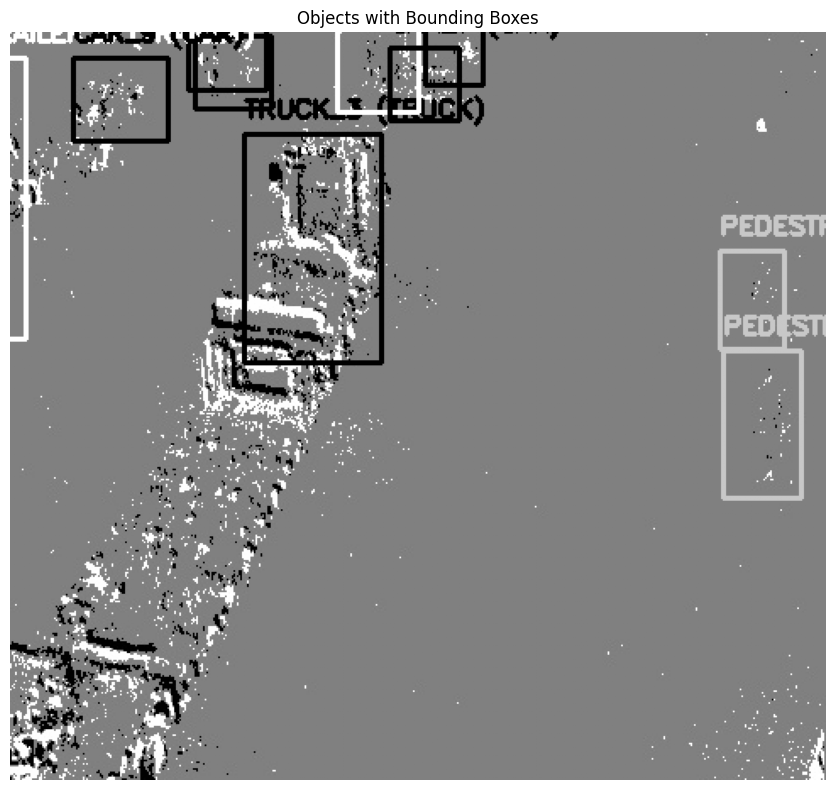

In [50]:
result = draw_boxes_from_openlabel(image_eb_cropped, label_eb, transform=transform) # BUG if you change to positional paremeters it breaks

plt.figure(figsize=(12, 8))
plt.imshow(result ,cmap='gray'  )
plt.title('Objects with Bounding Boxes')
plt.axis('off')
plt.tight_layout()
plt.show()

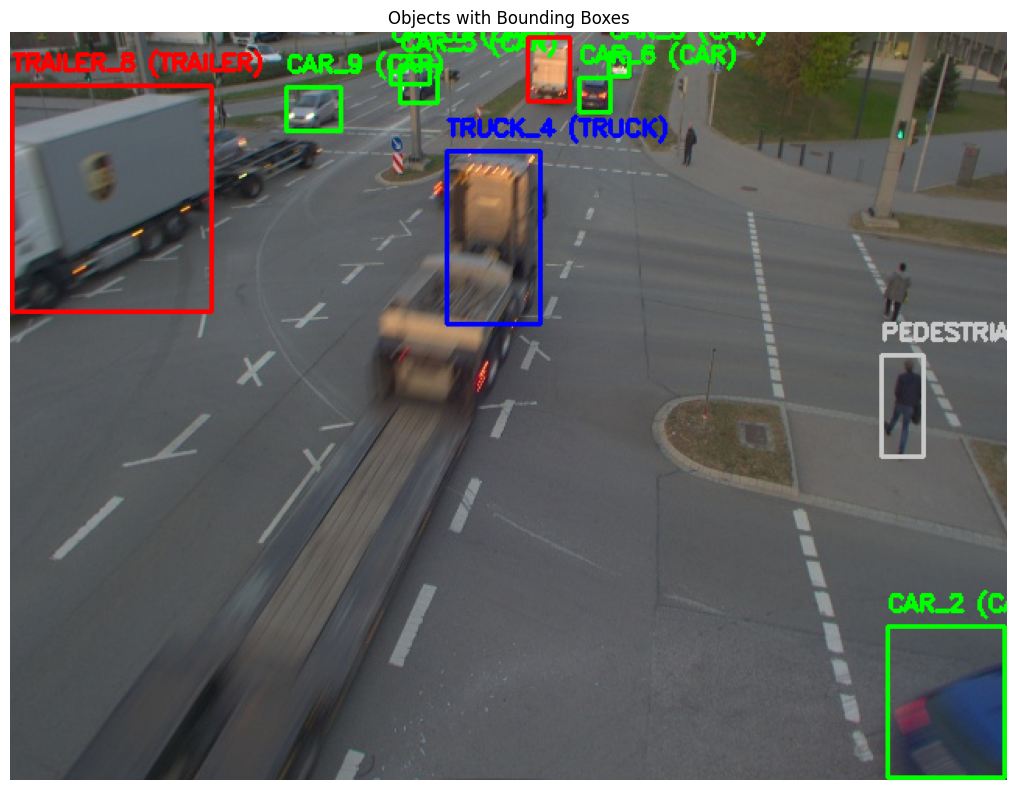

In [39]:
# Usage
result = draw_boxes_from_openlabel(image, label)

plt.figure(figsize=(12, 8))
plt.imshow(result)
plt.title('Objects with Bounding Boxes')
plt.axis('off')
plt.tight_layout()
plt.show()

In [40]:
image_eb.shape

(480, 640, 1)

undistort the event image 

In [41]:


calib_roi_rgb = np.loadtxt(project_root + "/data/TUMTraf_Event_Dataset/calibration/intrinsic/rgb_8mm_roi.txt")
rgb_roi_x, rgb_roi_y, rgb_roi_w, rgb_roi_h = calib_roi_rgb.astype(int)

calib_roi_eb = np.loadtxt(project_root + "/data/TUMTraf_Event_Dataset/calibration/intrinsic/eb_8mm_roi.txt")
eb_roi_x, eb_roi_y, eb_roi_w, eb_roi_h = calib_roi_eb.astype(int)




print("EB ROI:", f"x_offset={eb_roi_x}, y_offset={eb_roi_y}, width={eb_roi_w}, height={eb_roi_h}")

print("RGB ROI:", f"x_offset={rgb_roi_x}, y_offset={rgb_roi_y}, width={rgb_roi_w}, height={rgb_roi_h}")



EB ROI: x_offset=9, y_offset=13, width=612, height=451
RGB ROI: x_offset=12, y_offset=29, width=1894, height=1141
